In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


#### 概率思维涵盖了贝叶斯统计的基本概念及其对数据分析的影响。 本章包含本书其余部分中使用的大多数基本思想。概率用于衡量我们对参数的不确定性，贝叶斯定理是根据新数据正确更新这些概率的机制，有望减少我们的不确定性。

为什么是概率？ 因为概率是建模不确定性的正确数学工具，所以让我们漫步在分叉路径的花园中。从贝叶斯角度看，概率是一种量化陈述不确定性水平的度量。
总而言之，用概率建模不确定性不一定与关于自然在最基本的水平上是确定性还是随机性的争论有关，也与主观个人信念无关。 相反，这是一种纯粹的方法论方法来对不确定性进行建模。 我们认识到大多数现象很难掌握，因为我们通常必须处理不完整和/或嘈杂的数据，我们固有地受到进化雕刻的灵长类动物大脑的限制，或您可能添加的任何其他合理原因。 因此，我们使用一种明确考虑不确定性的建模方法。

##### 从实践的角度来看，本节中最相关的信息是贝叶斯方法将概率用作量化不确定性的工具。

克伦威尔法则是一个原则，即您不应该为逻辑上无法证明为真的任何事件赋予概率1，除非逻辑上可以证明其为假，否则绝不给任何事件赋予概率0-参见第91页 丹尼斯·林德利（Dennis Lindley）了解不确定性。 它源于克伦威尔（Cromwell）向苏格兰教会发出的呼吁，“认为您可能会认错”。

荷兰书论证的要点是表明理性人必须具有随机事件的主观概率，并且这些概率必须满足概率的标准公理。客观主义者相信概率的频率理论定义，指的是诸如抛硬币之类的事件的客观结果。这在定义随机事件（如赛马）的概率时会产生问题-我们无法在相同的情况下重复该事件来学习概率，而从长远来看，概率将与获胜的比例相对应。主观主义者认为，概率可以通过信念来定义。客观主义者说，信念过于模糊和定性，无法用于概率。 《荷兰书》的论点（另请参见相关的“资金泵论”）表明，关于概率的信念必须是定量的，并且必须满足标准的概率公理。首先，假设具有主观概率的人愿意根据这些概率进行公平的下注。然后表明，如果这些主观概率不满足概率公理，我们可以创建一个“荷兰语书”，这是一组赌注，可以确保这些“不连贯”信念的持有者肯定损失，而无论随机结果如何事件。可以提出很多人不赌博的异议。主观主义者回答说，无论人们是否实际下注，确保损失的下注的存在都是不理性的标志。这个话题仍然是有争议的，有深刻而艰难的争论，而且双方都有重量级人物。

![title](1_4.png)

在本示例中，无论哪个马获胜，庄家都会支付200美元（包括返还获胜的股份），但下注者下注210美元，因此在比赛中损失10美元。

但是，如果撤回了第四匹马，而博彩公司没有调整其他赔率，则隐含概率总计为0.95。在这种情况下，赌徒总是可以通过在其余三匹马上分别下注100美元，50美元和40美元来获得10美元的利润，而不必在撤回的马匹上投入20美元，而现在这匹马已经无法取胜了。

当异国情调的赌注提供不一致的赔率时，例如预测马匹完成的顺序，荷兰书的其他形式也可能存在。通过以电子方式提供有竞争力的固定赔率赌博，赌徒有时可以通过从不同庄家中选择最佳赔率来创建荷兰语图书，实际上是在进行套利操作。庄家应做出反应，根据需求调整提供的赔率，以消除潜在的利润。

在贝叶斯概率中，弗兰克·P·拉姆齐和布鲁诺·德·芬内蒂要求个人的信念保持连贯性，以便无论用哪种方式下注，都无法针对他们做出荷兰书。为此的必要条件和充分条件是，他们的信念程度满足概率公理。

在经济学中，消费者X可以荷兰语预订的情况的经典示例是，他或她是否具有不及格的偏好。假设对于此消费者，A优先于B，B优先于C，C优先于A。然后，假设人口中的其他人Y拥有其中一种商品。在不失一般性的前提下，假设Y具有良好的A。然后，Y可以首先将A卖给X，得到B +ε。然后以C +ε的价格将B卖给X；然后将C卖给X以得到A +ε，其中ε是少量的资产。经过这一系列的交易后，X将Y的3·ε给予Y，却一无所获。 Y将利用X的不及格偏好来利用套利机会，从而将X变成“钱泵”。
经济学家通常认为，喜欢X的人会从市场上夺走他们的全部财富。如果是这种情况，我们将不会观察到具有不张扬性或其他功能的偏好，这些偏好使人们可以荷兰语预订。但是，如果人们对自己的不稳定性有些复杂，并且/或者套利者的竞争将epsilon降为零，那么仍然可以观察到非“标准”偏好。


In [2]:
az.style.use('arviz-darkgrid')

In [3]:
μ = 0.
σ = 1.
X = stats.norm(μ, σ)
x = X.rvs(3)
x

array([-1.49190897,  1.05656868,  0.48102068])

#### 对随机含义的一个普遍误解是，您可以从随机变量中获得任何可能的值，或者所有值均具有同等的可能性。 随机变量的允许值及其概率受概率分布严格控制，而随机性仅是由于我们无法预测每次试验中将获得的确切值这一事实而产生的。 每次执行前面的代码，我们都会得到三个不同的数字，但是如果我们对代码进行数千次迭代，我们将能够凭经验检查采样值的均值是否在零附近，并且有95％的采样值 值在[-1.96，+1.96]范围内。 请不要相信我，请使用您的Python语言能力并亲自进行验证。 如果研究正态分布的数学性质，我们可以得出相同的结论。

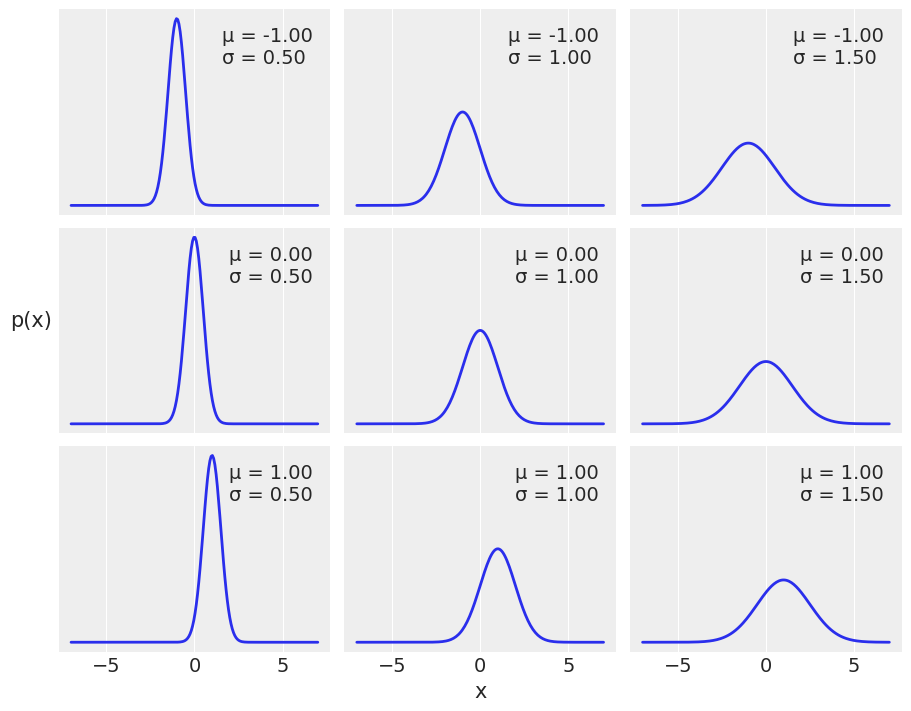

In [7]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])
plt.savefig('B11197_01_01.png', dpi=300);

许多模型都假设随机变量的连续值都是从同一分布中采样的，并且这些值彼此独立。 在这种情况下，我们可以说这些变量是独立且相同分布的（iid）变量。 使用数学符号，我们可以看到，如果对于x和y的每个值p（x，y）= p（x）p（y），则两个变量是独立的。非iid变量的常见示例是时间序列，其中随机变量中的时间依赖性是应考虑的关键特征。

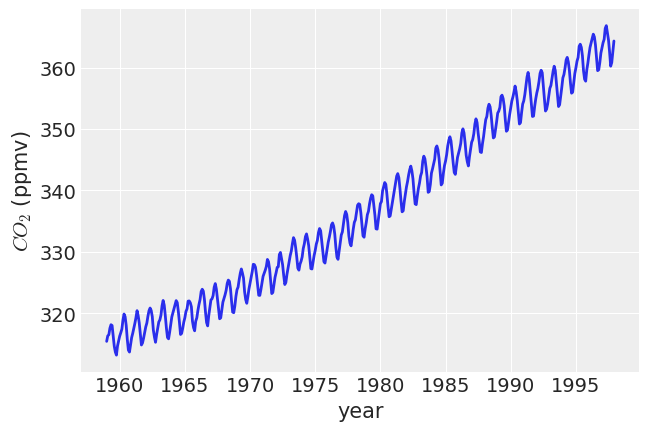

In [9]:
data = np.genfromtxt('../data/mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:,0], data[:,1])
plt.xlabel('year')
plt.ylabel('$CO_2$ (ppmv)')
plt.savefig('B11197_01_02.png', dpi=300)

####   贝叶斯定理                                                $p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)}$

$p(\theta)$: Prior

$p(y|\theta)$: Likelihood

$p(\theta|y)$: Posterior

$p(y)$: Marginal likelihood

先验分布应该反映我们在看到数据之前对参数值的了解。 如果我们像乔恩·斯诺（Jon Snow）一样一无所知，我们可以使用不会传递过多信息的固定先验。 总的来说，我们会比固定优先级更好，这将在本书中学习。 使用先验是为什么有些人仍然将贝叶斯统计视为主观的原因，即使先验只是我们在建模时所做的另一个假设，因此与其他任何假设（如可能性）一样主观（或客观）。

似然是我们将如何在分析中引入数据。 它表示给定参数的数据的合理性。 在某些文本中，您会发现人们称其为采样模型，统计模型或仅称为模型。 我们将继续使用似然这个名称，并将其称为先验和似然模型的组合。

后验分布是贝叶斯分析的结果，反映了我们对问题的所有了解（根据我们的数据和模型）。后验是模型中参数的概率分布，而不是单个值。这种分布是先验概率与可能性之间的平衡。有一个众所周知的笑话：贝叶斯人是一个隐约地期待着一匹马，瞥见一头驴子的人，坚信自己已经看过骡子。听到这个笑话后消除情绪的一种极好的方法是，解释一下，如果可能性和先验性都含糊不清，您将得到一个后验，反映了关于看到骡子而不是马的模糊信念。无论如何，我喜欢这个笑话，而且我喜欢它如何捕捉后验的想法，它在某种程度上是先验与可能性之间的折衷。从概念上讲，我们可以根据（新）数据将后验视为更新的先验。实际上，来自一个分析的后验可以用作新分析的先验。这使得贝叶斯分析特别适合分析按顺序可用的数据。例如，自然灾害预警系统可以处理来自气象站和卫星的在线数据。有关更多详细信息，请阅读有关在线机器学习方法的信息。

最后一项是边际可能性，也称为证据。 形式上，边际可能性是观察在参数可以采用的所有可能值上平均的数据的概率（如前所述）。 无论如何，对于本书的大部分内容，我们不会在乎边际可能性，我们会将其视为简单的归一化因子。 之所以可以这样做，是因为在分析后验分布时，我们只关心参数的相对值，而不关心参数的绝对值。 您可能还记得在上一节中讨论如何解释概率分布图时提到过这一点。 如果忽略边际可能性，则可以将贝叶斯定理写为比例：

![title](1_5.png)

##### 抛硬币问题，或者如果您想在聚会上听上去喜欢的话，可以使用beta二项式模型，这是统计学中的经典问题，
其处理过程是这样的：我们抛硬币多次，并记录得到的正面和反面。 根据这些数据，我们尝试回答诸如硬币是否公平？ 或者，更一般而言，硬币的偏向度如何？ 尽管这个问题听起来很沉闷，但我们不应低估它。 掷硬币问题是学习贝叶斯统计基础知识的一个很好的例子，因为它是一个简单的模型，我们可以轻松地对其进行求解和计算。 此外，许多实际问题包括二进制互斥结果，例如0或1，正面或负面，赔率或偶数，垃圾邮件或火腿，热狗或非热狗，猫或狗，安全或不安全以及健康或不健康。 因此，即使在谈论硬币时，该模型也适用于所有这些问题。

![title](1_1.png)

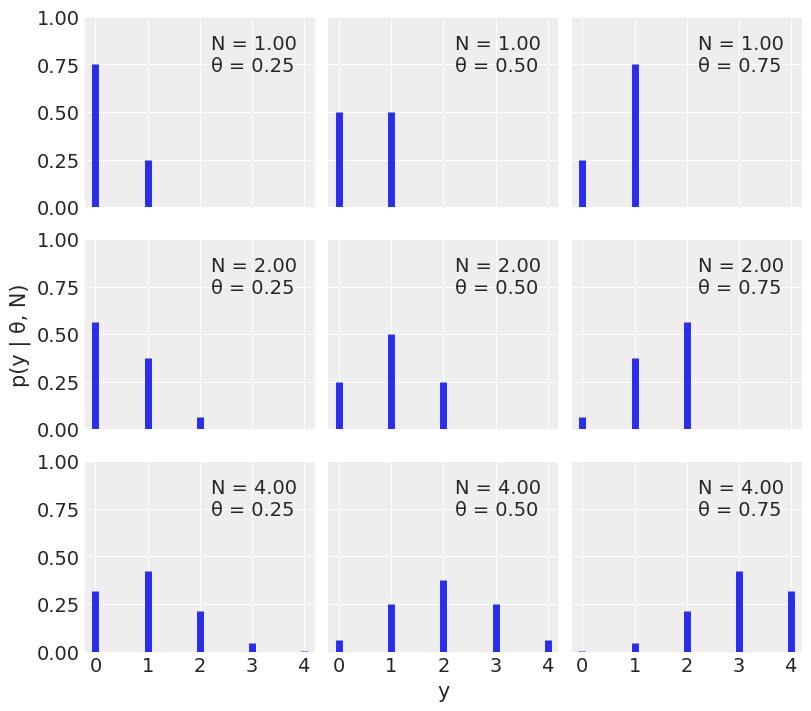

In [11]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)
plt.savefig('B11197_01_03.png', dpi=300)

我真的很喜欢beta分布以及我们可以从中获得的所有形状，但是为什么我们在模型中使用它呢？对于此问题和其他问题，有许多理由使用beta分布。

其中之一是*beta分布限制在0到1之间*，就像我们的参数一样。通常，当我们要建模二项式变量的比例时，我们使用beta分布。

另一个原因是它的多功能性。从上图中可以看出，分布采用几种形状（均限于[0，1]区间），包括均匀分布，高斯分布和U分布。

第三个原因，β分布是二项分布之前的共轭（我们将其用作可能性）。似然的共轭先验是先验，当给定的似然结合使用时，返回具有与先验相同的功能形式的后验。即，每当我们使用beta分布作为先验且使用二项式分布作为似然时，我们将获得beta作为后验分布。还有其他共轭先验对。例如，正态分布是其自身的共轭先验。多年来，贝叶斯分析一直限于使用共轭先验。共轭可确保后验的数学易处理性，这很重要，因为贝叶斯统计中的一个常见问题以我们无法解析解决的后验结束。在开发合适的计算方法来解决概率方法之前，这是一个突破。从第2章，概率编程开始，我们将学习如何使用现代计算方法来解决贝叶斯问题，无论我们是否选择共轭先验。

![title](1_2.png)

Beta分布具有两个参数，即平均概率p和形状参数theta。形状参数theta描述了分布的分布程度。 当theta = 2时，从零到1的每个概率均相等。 当θ增加到2以上时，概率分布将更加集中。 当θ<2时，分布是如此分散，以至于接近零和一的极端概率比均值更有可能。

a = PBAR * THETA
b = (1 - PBAR) * THETA

so，a/(a+b)=PBAR

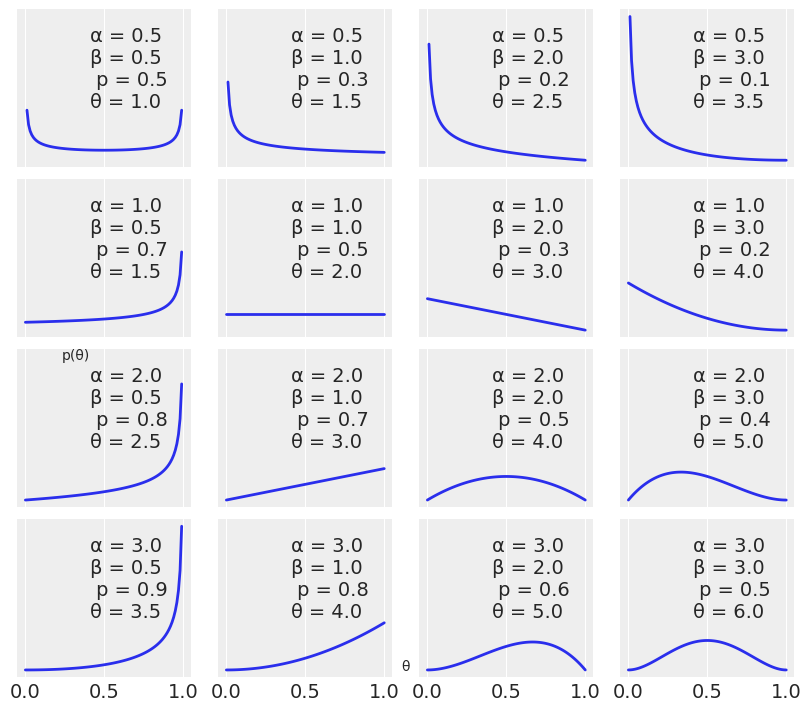

In [5]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        p = a/(a+b)
        θ= a/p 
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}\n p = {:2.1f} \nθ = {:2.1f}".format(a, b,p,θ), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)
plt.savefig('B11197_01_04.png', dpi=300)

![title](1_3.png)

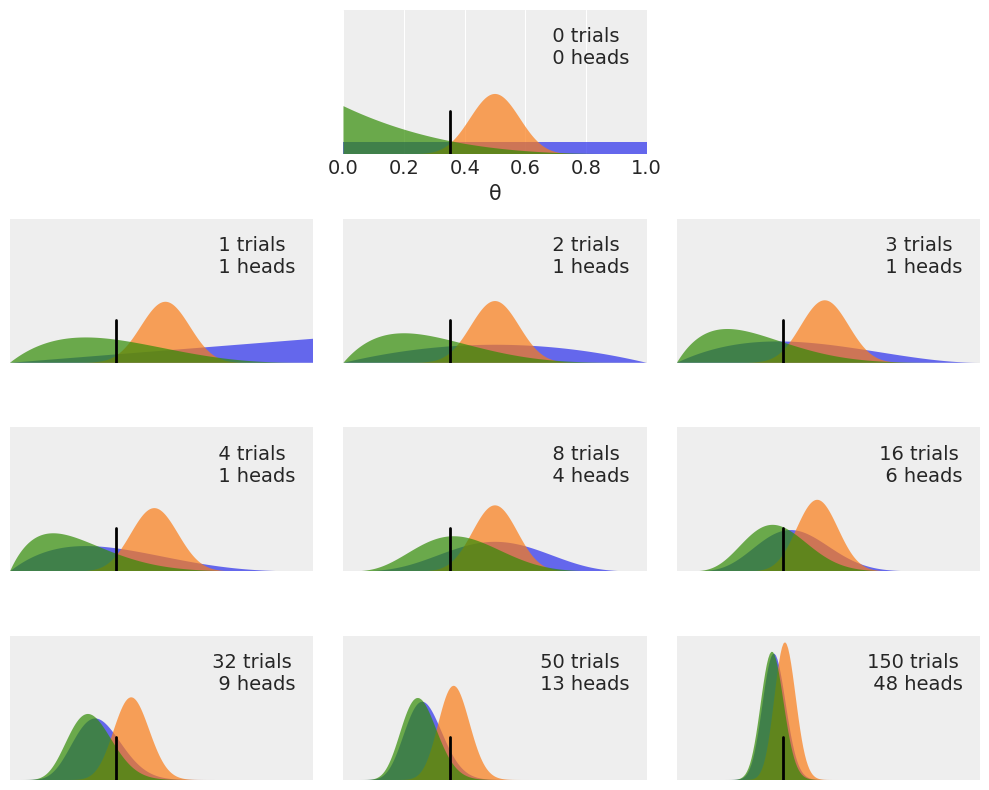

In [13]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]  #直线；山坡；左高右低
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2) #画四行3列，本次为第二个做上x标注
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]   #之前尝试的结果
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)   #后验概率公式，如上图
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()
plt.savefig('B11197_01_05.png', dpi=300)

第一个子图上，我们进行了零次试验，因此这三条曲线代表了我们的先验条件：

均匀分布（蓝色）先验。 这代表了先验同等可能的偏差的所有可能值。

高斯型（橙色）先验在0.5左右居中并集中，因此该先验与指示硬币具有大致相同的落地正面或反面机会的信息兼容。 我们也可以说这个先验与大多数硬币都是公平的信念是相容的。 尽管贝叶斯讨论中通常使用信念，但我们认为最好讨论由数据提供信息的模型和参数。

偏斜的（绿色）先验结果偏重于尾偏结果。

其余子图显示了后续试验的后验分布。 在每个子图中的图例中都标明了试验次数（或抛硬币次数）和正面数。 在0.35处还有一条黑色的垂直线，代表的真实值。 当然，在实际问题中，我们不知道此值，而仅仅是出于教学原因。
##### 贝叶斯分析的结果是后验分布，不是单个值，而是给定数据和我们的模型的合理值的分布。
##### 最可能的值由后验模式（分布的峰值）给出。 后验的扩展与不确定度成正比
##### 参数值； 分布越分散，我们就越不确定。
##### 直观地，当我们观察到更多支持该结果的数据时，我们对结果会更有信心。 因此，即使从数字上看，在八次试验中看到四个正面也比在两次试验中观察到一个正面给我们更大的信心，即偏差为0.5。 这种直觉反映在后部，因为您可以检查自己是否注意第三和第六个子图中的（蓝色）后部。 当模式相同时，第三子图中的扩散（不确定性）要大于第六子图中的扩散（不确定性）。
##### 给定足够大的数据量，具有不同先验的两个或多个贝叶斯模型将趋于收敛到相同的结果。 在无限数据的限制下，无论我们使用哪个先验，它们都将提供相同的后验。 请记住，无限是一个极限，而不是数量，因此从实际的角度来看，对于有限且数量很少的数据点，我们几乎可以毫无区别地得到后验。
##### 后验者收敛到相同分布的速度有多快取决于数据和模型。 在上图中，我们可以看到来自蓝色先验（均匀）和绿色先验（偏向尾部）的后代收敛速度更快，几乎达到相同的分布，而橙色后验（来自集中的后验）需要更长的时间。 之前）。 实际上，即使经过150次试验，以某种方式也很容易将橙色后视点识别为与其他两个不同的分布。
##### 从图中不明显的是，如果我们顺序更新后验，则与一次性完成后得到的结果相同。 我们可以计算150次后验，每次添加一个以上的观察值，并将获得的后验用作新的后验，或者我们可以一次计算150次抛掷的后验。 结果将完全相同。 此功能不仅非常合理，而且还提供了一种自然的方式来更新我们的估算值，这是许多数据分析问题中常见的情况。

从前面的示例中可以明显看出，先验可以影响推理。 这是完全可以的，事前应该这样做。 贝叶斯分析的新手（以及这种范式的批评者）通常对如何选择先验感到有些紧张，因为他们不希望先验充当不能让数据说明自己的审查员！ 可以，但是我们必须记住，数据并不能真正说出来。 充其量是数据杂音。 数据仅在我们的模型（包括数学和心理模型）的背景下才有意义。 科学史上有很多例子，其中相同的数据导致人们对相同的主题进行不同的思考，即使您的观点基于正式模型，也可能发生这种情况。

有些人喜欢使用非信息性先验（也称为统一，模糊或分散先验）的想法；这些先验对分析的影响最小。虽然可以使用它们，但总的来说，我们可以做得更好。在本书中，我们将遵循Gelman，McElreath，Kruschke和其他许多人的建议，并且我们希望使用信息量较弱的先验知识。对于许多问题，我们通常对参数可以采用的值有所了解，我们可能知道参数被限制为正数，或者我们可能知道参数可以采用的近似范围，或者我们期望值是否接近零或低于/高于某些值。在这种情况下，我们可以使用先验条件在我们的模型中放置一些弱信息，而不必担心太过急。因为这些先验可将后验分布保持在一定的合理范围内，所以它们也被称为正则化先验。如果我们拥有高质量的信息来定义这些先验，则使用信息先验也是一种有效的选择。信息先验是传达大量信息的强大先验。根据您的问题，找到这种类型的先验可能很容易，也可能很难。例如，在我的工作领域（结构生物信息学）中，人们一直在以贝叶斯和非贝叶斯的方式使用他们可以研究，特别是预测蛋白质结构的所有先验信息。这是合理的，因为数十年来我们一直在从数千个经过精心设计的实验中收集数据，因此我们拥有大量可信赖的先验信息供我们使用。不使用它是荒谬的！因此，带回家的信息是这样的：如果您拥有可靠的先验信息，则没有理由丢弃该信息，包括毫无意义的论点，即客观意味着丢弃有价值的信息。试想一下，如果每次汽车工程师不得不设计一辆新车，他们都必须从头开始，并重新发明内燃机，车轮，以及整个汽车的概念。那不是事情应该起作用的方式。

知道我们可以根据先验的相对强度将先验分为几类，这并不会使我们对从中进行选择感到不那么紧张。也许完全没有先验会更好—这样会使建模更加容易，对吧？好吧，不一定。先验可以使模型表现得更好，具有更好的泛化特性，并且可以帮助我们传达有用的信息。而且，即使没有明确设置先验，每个模型（无论是否存在贝叶斯模型）都以某种方式具有某种先验。实际上，许多结果是来自频繁出现的统计数据，可以看作是在某些情况下（例如平坦先验）的贝叶斯模式的特殊情况。估计参数的一种常见的频繁性方法被称为最大似然法。这种方法避免了设置先验，而只是通过找到那个值来使可能性最大化而起作用。通常通过在我们估计的参数符号的顶部添加一个小帽子来表示该值，例如或有时（甚至是两者）。是点估计（数字），而不是分布。对于掷硬币的问题，我们可以分析得出：
$\hat{\theta}= \frac yN$
您将能够自己检查蓝色后验的模式（对应于统一/平坦先验的后验模式）是否与为每个子图计算的值一致。 因此，至少对于此示例，我们可以看到，即使最大似然方法未明确调用任何先验，也可以将其视为贝叶斯模型的特殊情况，即具有统一先验的模型。

我们无法真正避免先验，但如果将其包括在分析中，我们将获得一些好处，包括合理价值的分配，而不仅仅是最可能的价值的分配。 明确说明先验的另一个好处是，我们可以获得更透明的模型，这意味着它们更容易批评，调试（广义上来说），并有望得到改进。 建立模型是一个反复的过程。 有时迭代需要几分钟，有时可能需要数年。 有时它只会涉及到您，有时甚至会涉及到您甚至不认识的人。

模型中的可重复性很重要，而透明的假设对此也有帮助。 此外，如果不确定某个特殊分析，我们可以自由使用一个以上的先验（或可能性）进行给定分析。 探索不同先验的影响也可以带来有价值的信息。 建模过程的一部分与质疑假设有关，而先验（和可能性）仅此而已。 不同的假设将导致不同的模型以及可能不同的结果。 通过使用数据和我们对问题的专业知识，我们将能够比较模型，并在必要时决定赢家。 第5章“模型比较”将专门讨论此问题。 由于先验在贝叶斯统计中起着核心作用，因此当我们面临新问题时，我们将继续讨论它们。 因此，如果您对此讨论有疑问并感到有些困惑，请保持冷静，不要担心，人们已经困惑了数十年，讨论仍在继续。

#### 创建报告和传达结果是统计学和数据科学实践的核心。

 <img src="B11197_01_06.png" width="500">

贝叶斯分析的结果是后验分布，关于给定数据集和模型的参数的所有信息都包含在后验分布中。 因此，通过总结后验，我们总结了模型和数据的逻辑结果。 一种常见的做法是针对每个参数报告平均值（或众数或中位数），以了解分布的位置，并报告一些度量值（如标准偏差），以了解分散度以及不确定性 在我们的估计中。 标准偏差对于类似正态分布的分布很好，但是对于其他类型的分布（例如偏斜的分布）可能会产生误导。 因此，一种替代方法是使用以下措施。

总结后验分布分布的常用设备是使用最高后验密度（HPD）间隔。 HPD是包含概率密度的给定部分的最短间隔。 最常用的一种是95％HPD，通常伴随着50％HPD。 如果我们说某些分析的95％HPD为[2-5]，则意味着根据我们的数据和模型，我们认为所考虑的参数在2到5之间，概率为0.95。

If you are familiar with the frequentist paradigm, please note that HPD intervals are not the same as confidence intervals. The HPD has a very intuitive interpretation, to the point that people often misinterpret frequentist confidence intervals as if they were Bayesian credible intervals. Performing a fully-Bayesian analysis enables us to talk about the probability of a parameter having some value. This is not possible in the frequentist framework since parameters are fixed by design; a frequentist confidence interval contains or does not contain the true value of a parameter.

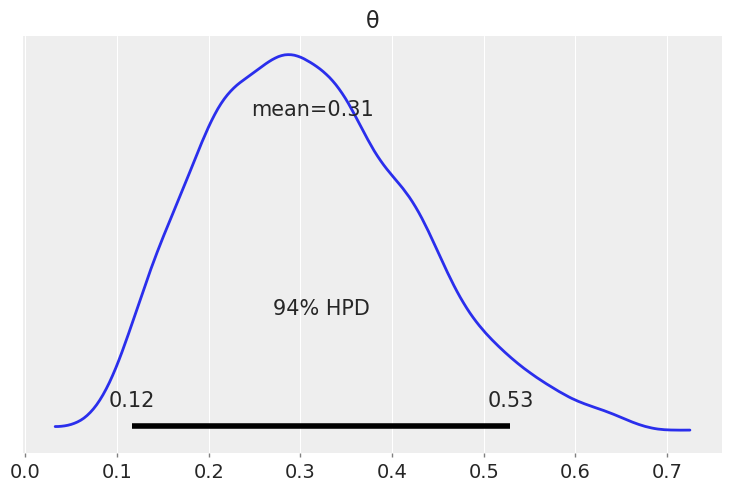

In [15]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})
plt.savefig('B11197_01_07.png', dpi=300)

<img src="B11197_01_08.png" width="500">